In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Dimonds/diamonds.csv')

In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
del df['Unnamed: 0']

In [7]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Данные без пропусков! Ура!

#EDA

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


##carat

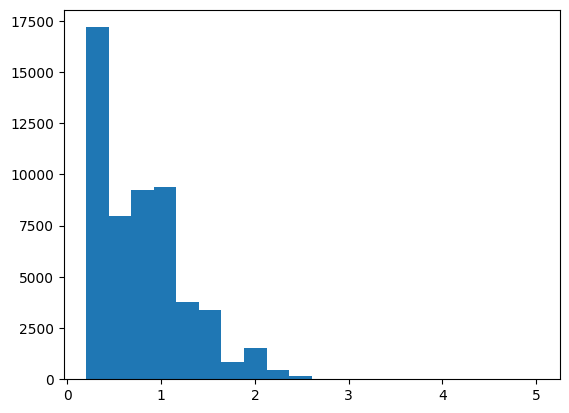

In [11]:
plt.hist(df['carat'], bins = 20)
plt.show()

<Axes: xlabel='carat'>

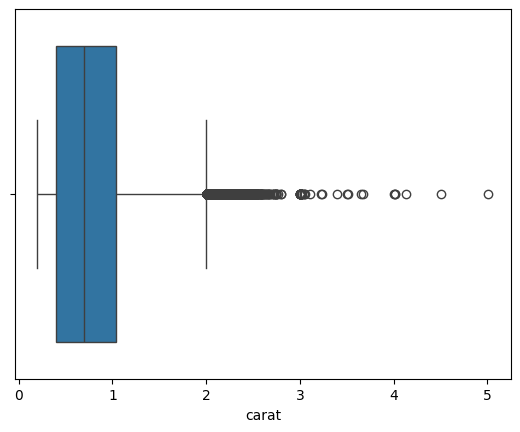

In [12]:
sns.boxplot(data = df, x = 'carat')

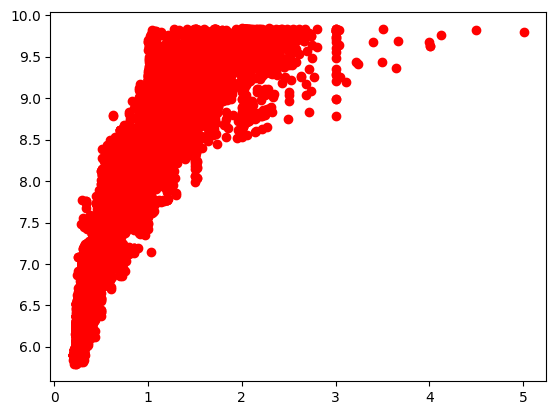

In [13]:
plt
plt.scatter(df['carat'], np.log(df['price']), color = 'red')

In [14]:
df_biggest = df[df['carat'] > 2]
df_other = df[df['carat'] <= 2]

In [15]:
Q1, Q3 = df['carat'].quantile([0.25, 0.75])
IQR = Q3 - Q1
bottom, top = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

In [16]:
df_other = df[(df['carat'] <= top) & (df['carat'] >= bottom)]
df_biggest = df[df['carat'] > top]

In [17]:
df_biggest.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,1889.0,2.153684,0.236704,2.01,2.02,2.06,2.20,5.01
depth,1889.0,61.769402,1.783937,55.60,60.70,61.90,62.70,70.60
table,1889.0,58.308894,2.366632,51.00,57.00,58.00,60.00,95.00
price,1889.0,14951.250397,2703.594528,5203.00,13228.00,15392.00,17065.00,18823.00
x,1889.0,8.262266,0.350177,0.00,8.09,8.21,8.39,10.74
y,1889.0,8.239037,0.343897,0.00,8.08,8.19,8.36,10.54
z,1889.0,5.082255,0.346707,0.00,4.99,5.06,5.16,6.98


Предположим, что выбросов здесь нет, просто брилиантов с большим размером(больше двух карат) у нас достаточно мало (около трех процентов)

Поэтому дальше будем смотреть отдельно на большие брилианты и маленькие

##x, y, z

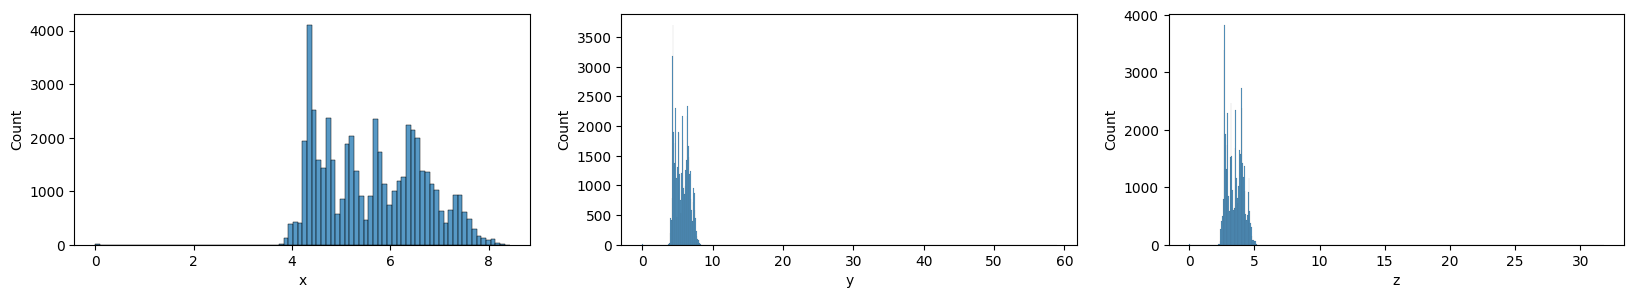

In [18]:
plt.figure(figsize=(20,3))
plt.subplot(1, 3, 1)
sns.histplot(data = df_other, x = 'x')
plt.subplot(1, 3, 2)
sns.histplot(data = df_other, x = 'y')
plt.subplot(1, 3, 3)
sns.histplot(data = df_other, x = 'z')
plt.show()

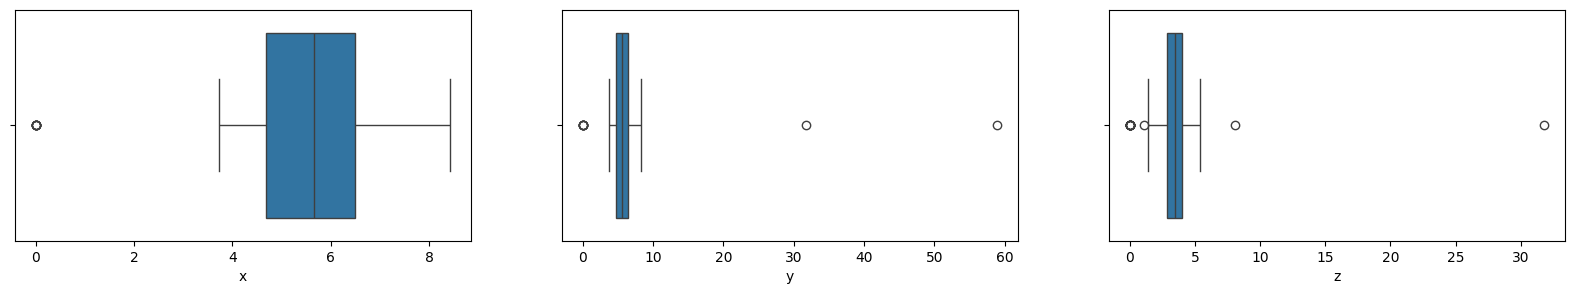

In [19]:
plt.figure(figsize=(20,3))
plt.subplot(1, 3, 1)
sns.boxplot(data = df_other, x = 'x')
plt.subplot(1, 3, 2)
sns.boxplot(data = df_other, x = 'y')
plt.subplot(1, 3, 3)
sns.boxplot(data = df_other, x = 'z')
plt.show()

Здесь видим очевидные выбросы, выкинем их используя z-критерий

In [20]:
from scipy import stats
import numpy as np

z1 = np.abs(stats.zscore(df_other['x']))
z2 = np.abs(stats.zscore(df_other['y']))
z3 = np.abs(stats.zscore(df_other['z']))

dummy_df = df_other[(z1 < 3) & (z2  < 3) & (z3 < 3)]

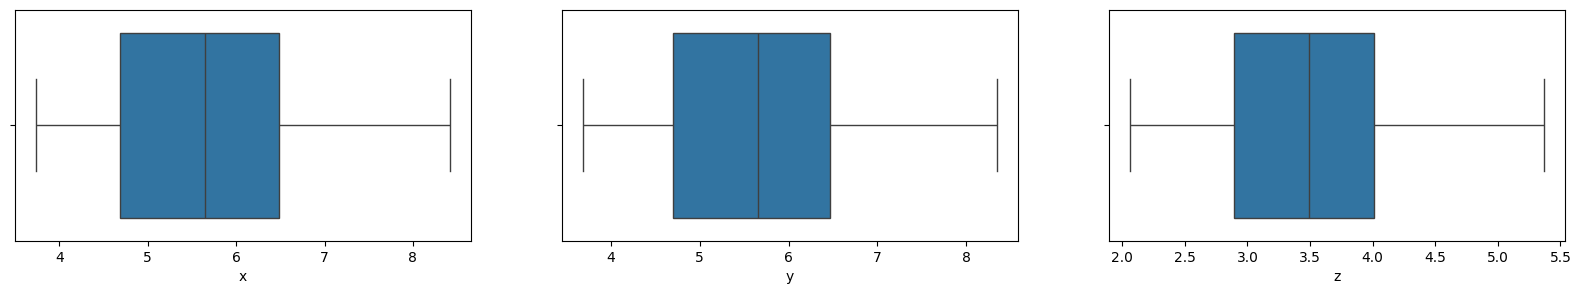

In [21]:
plt.figure(figsize=(20,3))
plt.subplot(1, 3, 1)
sns.boxplot(data = dummy_df, x = 'x')
plt.subplot(1, 3, 2)
sns.boxplot(data = dummy_df, x = 'y')
plt.subplot(1, 3, 3)
sns.boxplot(data = dummy_df, x = 'z')
plt.show()

In [22]:
df_other = dummy_df

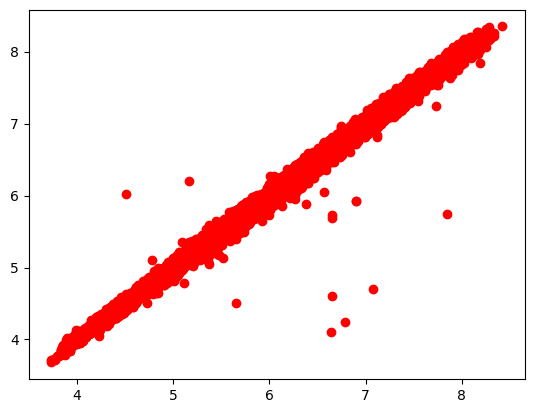

In [23]:
plt.scatter(df_other['x'], df_other['y'], color = 'red')

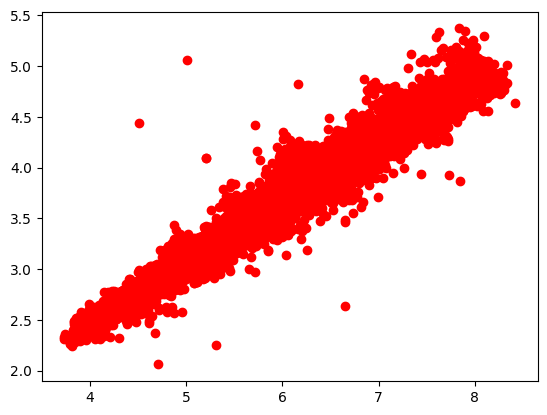

In [24]:
plt.scatter(df_other['x'], df_other['z'], color = 'red')

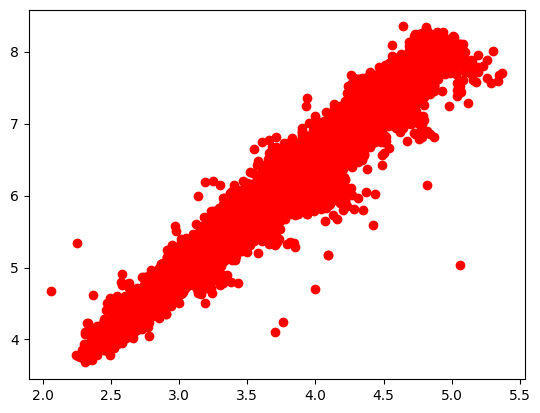

In [25]:
plt.scatter(df_other['z'], df_other['y'], color = 'red')

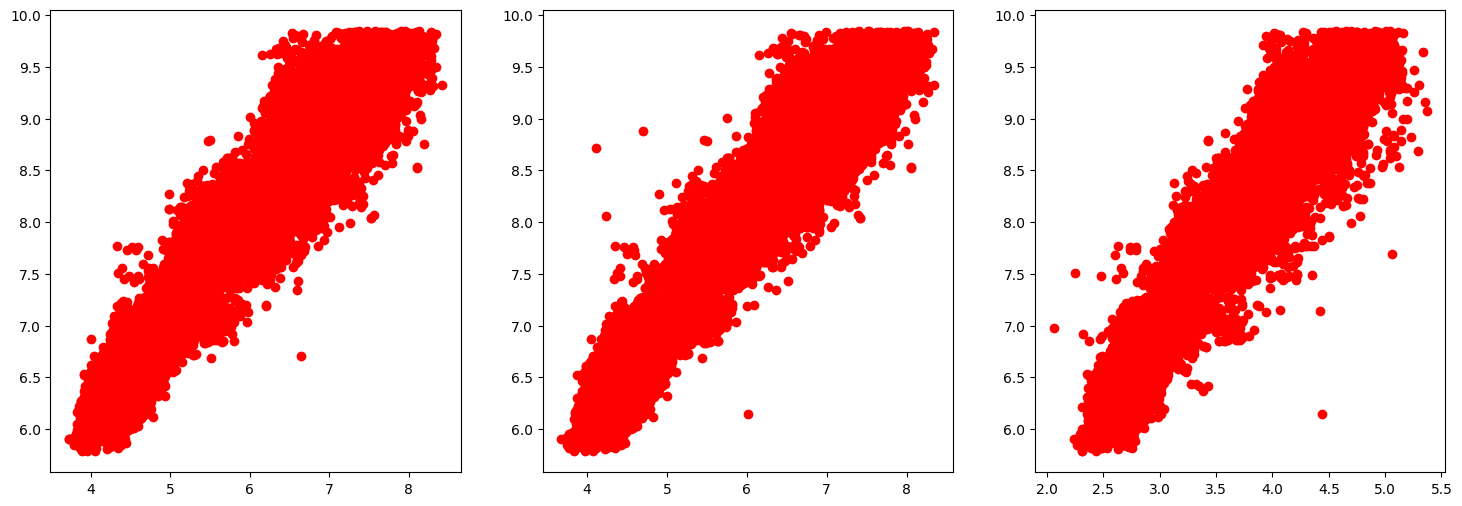

In [26]:
plt.figure(figsize=(18,6))
plt.subplot(1, 3, 1)
plt.scatter(df_other['x'], np.log(df_other['price']), color = 'red')
plt.subplot(1, 3, 2)
plt.scatter(df_other['y'], np.log(df_other['price']), color = 'red')
plt.subplot(1, 3, 3)
plt.scatter(df_other['z'], np.log(df_other['price']), color = 'red')
plt.show()

Видим, что между ценой брилианта и его размерами существует экспоненциальная зависимость

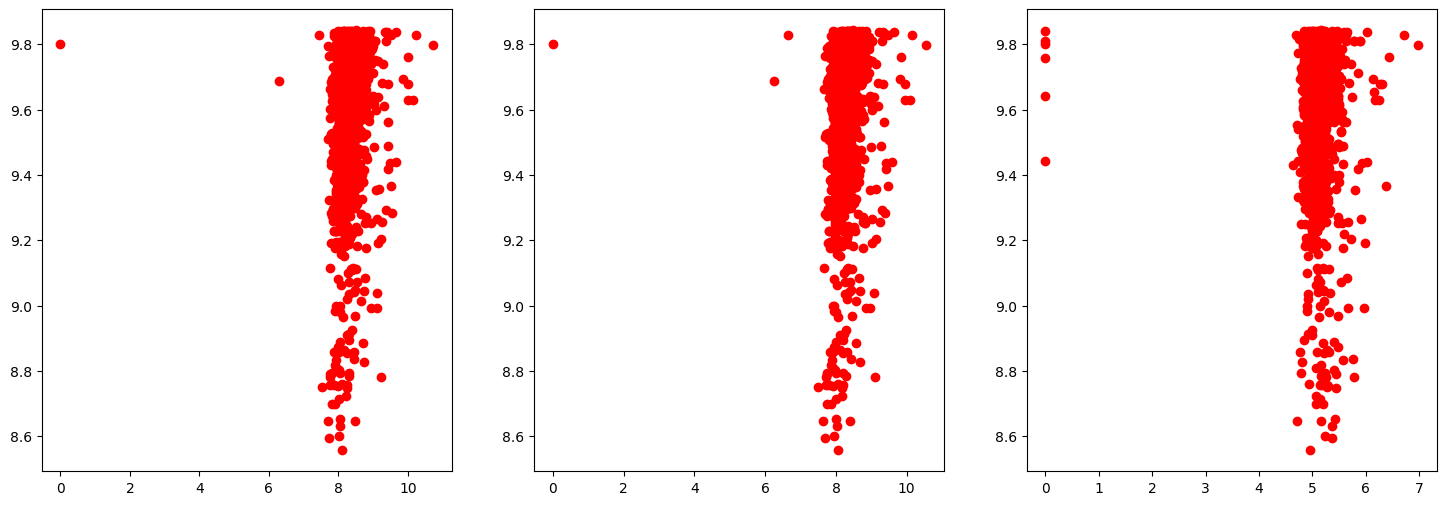

In [27]:
plt.figure(figsize=(18,6))
plt.subplot(1, 3, 1)
plt.scatter(df_biggest['x'], np.log(df_biggest['price']), color = 'red')
plt.subplot(1, 3, 2)
plt.scatter(df_biggest['y'], np.log(df_biggest['price']), color = 'red')
plt.subplot(1, 3, 3)
plt.scatter(df_biggest['z'], np.log(df_biggest['price']), color = 'red')
plt.show()

##depth

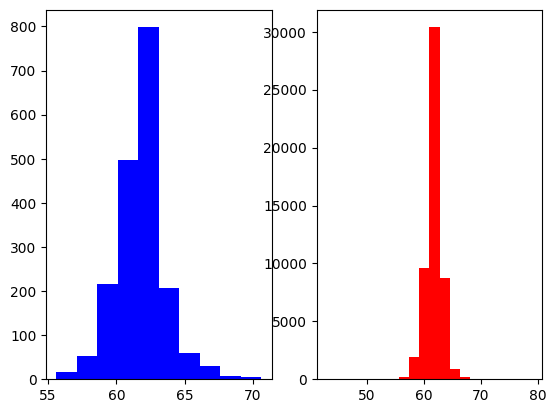

In [28]:
plt.subplot(1, 2, 1)
plt.hist(df_biggest['depth'], bins = 10, color = 'blue')
plt.subplot(1, 2, 2)
plt.hist(df_other['depth'], bins = 20, color = 'red', alpha = 1)

plt.show()

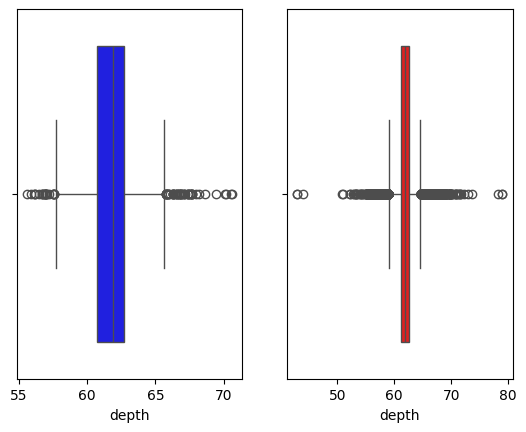

In [29]:
plt.subplot(1, 2, 1)
sns.boxplot(data = df_biggest, x = 'depth', color = 'blue')
plt.subplot(1, 2, 2)
sns.boxplot(data = df_other, x = 'depth', color = 'red')
plt.show()

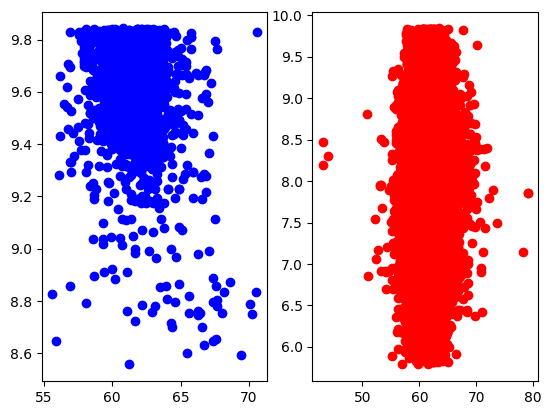

In [30]:
plt.subplot(1, 2, 1)
plt.scatter(df_biggest['depth'], np.log(df_biggest['price']), color = 'blue')
plt.subplot(1, 2, 2)
plt.scatter(df_other['depth'], np.log(df_other['price']), color = 'red')
plt.show()

Заметим, что сильной зависимости между параметром depth и ценой не наблюдается

##table

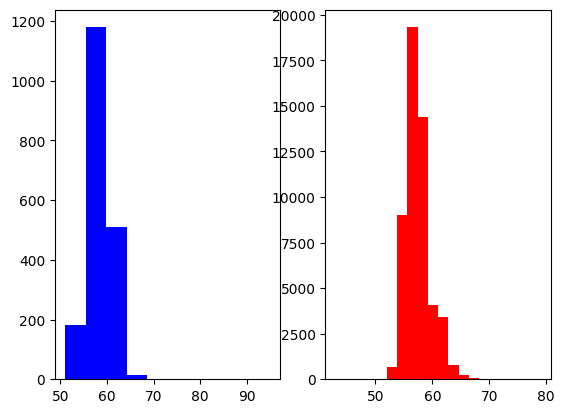

In [31]:
plt.subplot(1, 2, 1)
plt.hist(df_biggest['table'], bins = 10, color = 'blue')
plt.subplot(1, 2, 2)
plt.hist(df_other['table'], bins = 20, color = 'red')

plt.show()

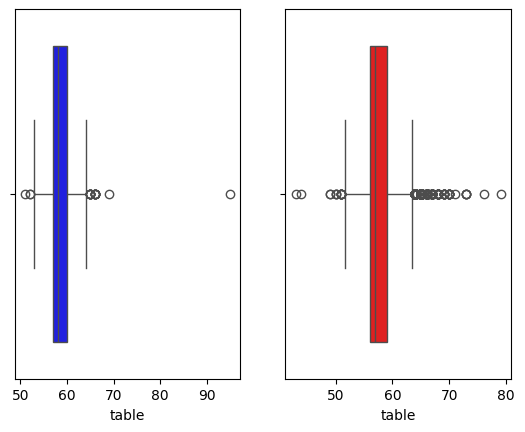

In [32]:
plt.subplot(1, 2, 1)
sns.boxplot(data = df_biggest, x = 'table', color = 'blue')
plt.subplot(1, 2, 2)
sns.boxplot(data = df_other, x = 'table', color = 'red')
plt.show()

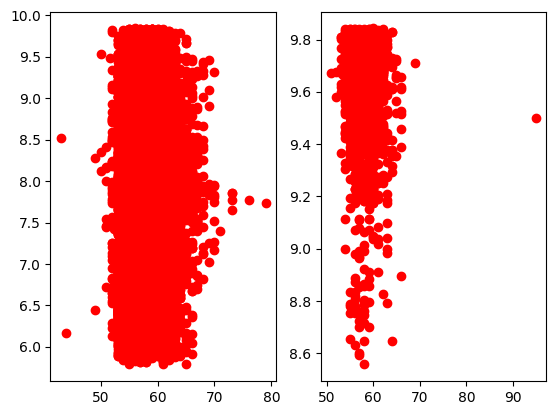

In [33]:
plt.subplot(1, 2, 1)
plt.scatter(df_other['table'], np.log(df_other['price']), color = 'red')
plt.subplot(1, 2, 2)
plt.scatter(df_biggest['table'], np.log(df_biggest['price']), color = 'red')
plt.show()

видим выброс в переменной  и убираем его

In [34]:
z1 = np.abs(stats.zscore(df_biggest['table']))

df_biggest= df_biggest[(z1 < 3)]

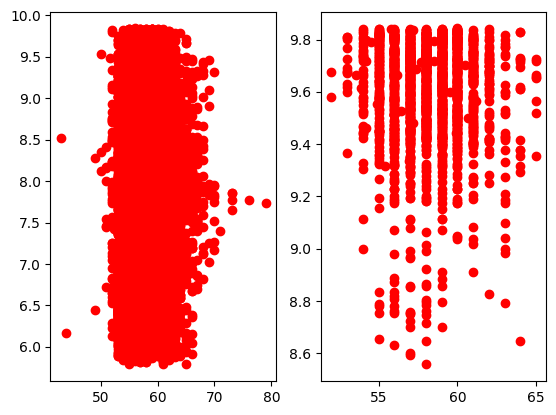

In [35]:
plt.subplot(1, 2, 1)
plt.scatter(df_other['table'], np.log(df_other['price']), color = 'red')
plt.subplot(1, 2, 2)
plt.scatter(df_biggest['table'], np.log(df_biggest['price']), color = 'red')
plt.show()

##cut

<Axes: xlabel='cut'>

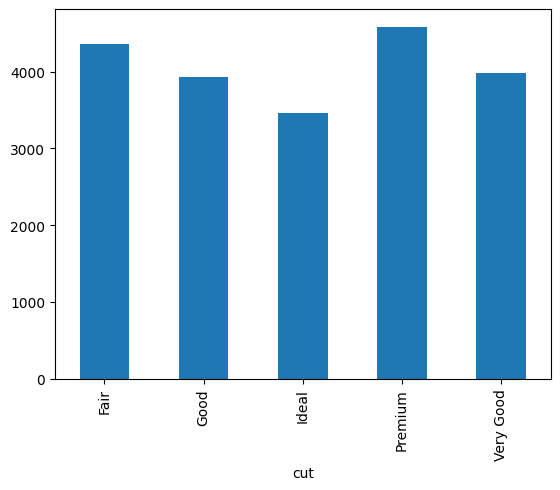

In [36]:
df.groupby('cut')['price'].mean().plot(kind = 'bar')

<Axes: xlabel='cut'>

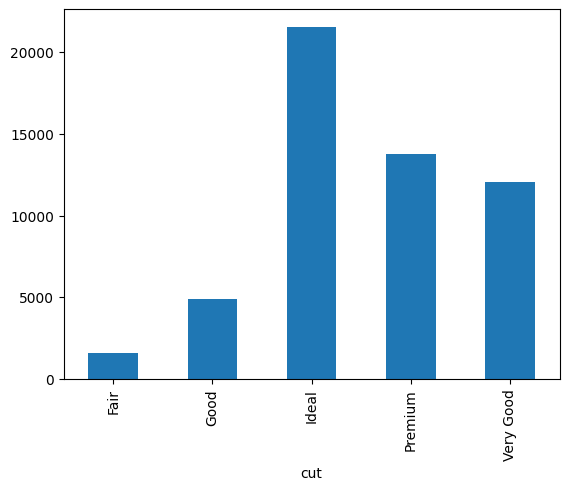

In [37]:
df.groupby('cut')['carat'].count().plot(kind = 'bar')

Видим, что категории Fair и Good содержит сильно меньше экземпляров, чем другие, кроме того есть положительня зависимость между качеством огранки кристала и его ценой

##color

<Axes: xlabel='color'>

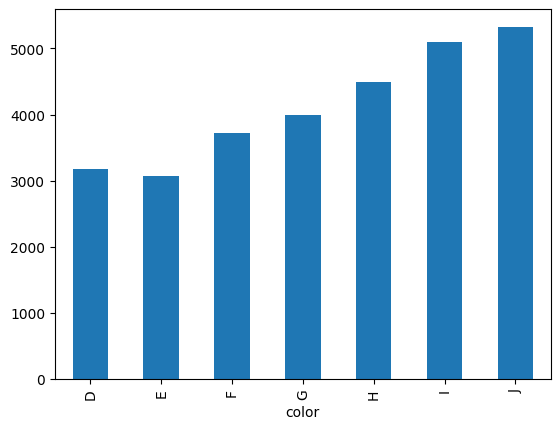

In [38]:
df.groupby('color')['price'].mean().plot(kind = 'bar')

<Axes: xlabel='color'>

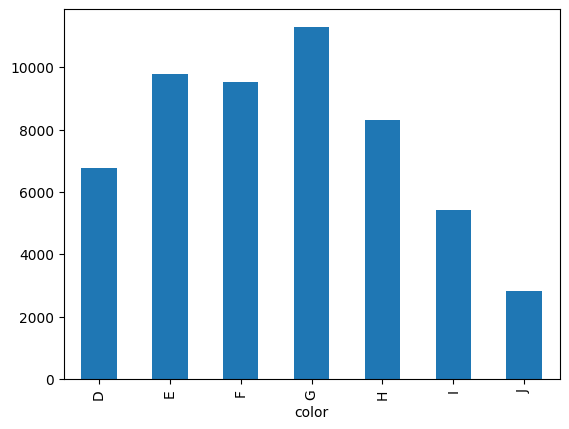

In [39]:
df.groupby('color')['carat'].count().plot(kind = 'bar')

Видим аналогичную связь - чем лучше цвет кристала, тем выше на него цена

##clarity

<Axes: xlabel='clarity'>

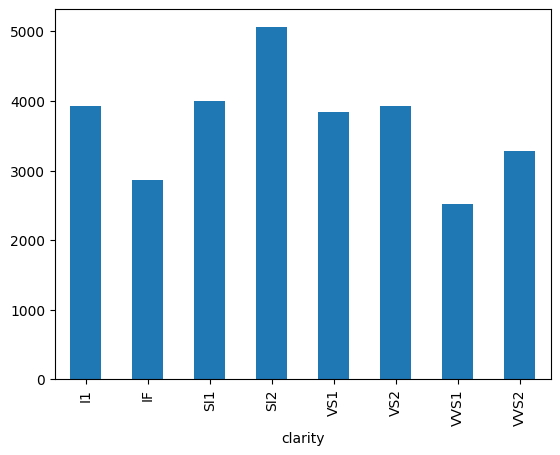

In [40]:
df.groupby('clarity')['price'].mean().plot(kind = 'bar')

<Axes: xlabel='clarity'>

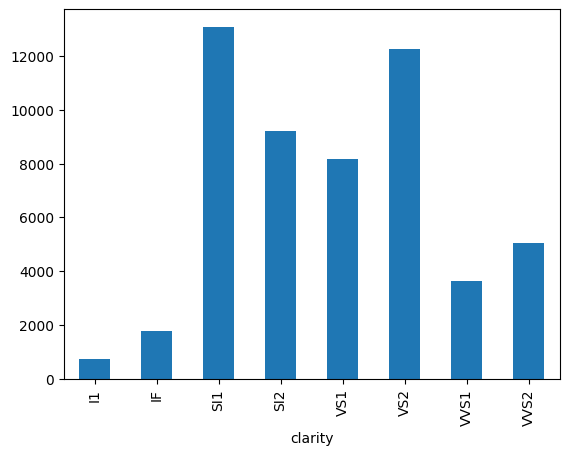

In [41]:
df.groupby('clarity')['carat'].count().plot(kind = 'bar')

То же самое

##price

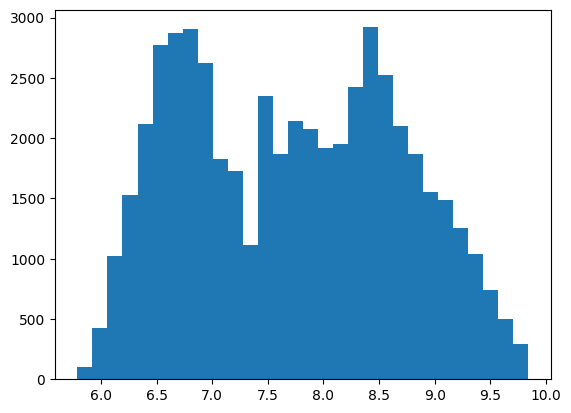

In [42]:
plt.hist(np.log(df_other['price']), bins = 30)
plt.show()

##depth and table

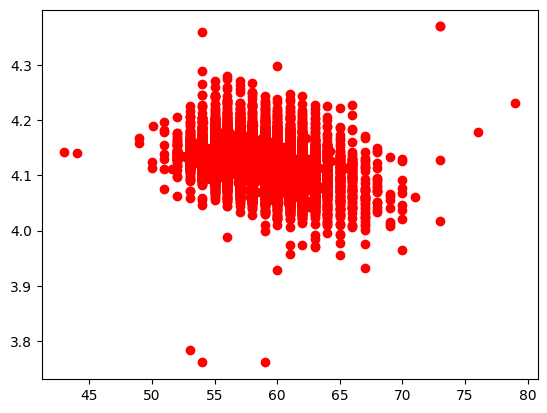

In [44]:
plt.scatter(df_other['table'], np.log(df_other['depth']), color = 'red')

##Подытожим-с

Итак, мы получили два фрейма данных. Осталось объединить их и посмотреть на них

In [43]:
my_df = df_other
my_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Посмотрим сколько записей осталось после чистки

In [44]:
print("Было:", df.shape[0])
print("Стало:", my_df.shape[0])
print("Осталось (в процентах): ", round(my_df.shape[0]/df.shape[0], 4)*100, "%", sep = "")

Было: 53940
Стало: 52031
Осталось (в процентах): 96.46000000000001%


In [45]:
my_df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,52031.0,0.748597,0.402049,0.20,0.39,0.70,1.02,2.00
depth,52031.0,61.748898,1.417954,43.00,61.10,61.80,62.50,79.00
table,52031.0,57.426175,2.223037,43.00,56.00,57.00,59.00,79.00
price,52031.0,3532.042013,3414.484239,326.00,928.00,2288.00,4956.00,18818.00
x,52031.0,5.639802,1.026807,3.73,4.69,5.65,6.48,8.42
y,52031.0,5.642528,1.020005,3.68,4.70,5.66,6.47,8.35
z,52031.0,3.483114,0.634734,2.06,2.89,3.49,4.01,5.37


##Нормировка данных

In [46]:
from sklearn.preprocessing import MinMaxScaler

float_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

my_df['price'] = np.log(my_df['price'])

minmax = MinMaxScaler(feature_range = (0, 1))
my_df[float_cols] = minmax.fit_transform(my_df[float_cols])

In [47]:
my_df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,52031.0,0.304776,0.223361,0.0,0.105556,0.277778,0.455556,1.0
depth,52031.0,0.520803,0.039388,0.0,0.502778,0.522222,0.541667,1.0
table,52031.0,0.400727,0.061751,0.0,0.361111,0.388889,0.444444,1.0
price,52031.0,0.476873,0.239387,0.0,0.257944,0.480447,0.671025,1.0
x,52031.0,0.407207,0.218935,0.0,0.204691,0.409382,0.586354,1.0
y,52031.0,0.420242,0.218417,0.0,0.218415,0.423983,0.597430,1.0
z,52031.0,0.429944,0.191763,0.0,0.250755,0.432024,0.589124,1.0


Здесь применили min_max_scaler ко всему набору численых данных, предварительно прологарифмировав таргетную переменную price

In [48]:
my_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.016667,Ideal,E,SI2,0.513889,0.333333,0.000000,0.046908,0.064240,0.111782
1,0.005556,Premium,E,SI1,0.466667,0.500000,0.000000,0.034115,0.034261,0.075529
2,0.016667,Good,E,VS1,0.386111,0.611111,0.000755,0.068230,0.083512,0.075529
3,0.050000,Premium,I,VS2,0.538889,0.416667,0.005978,0.100213,0.117773,0.172205
4,0.061111,Good,J,SI2,0.563889,0.416667,0.006715,0.130064,0.143469,0.208459


<Axes: >

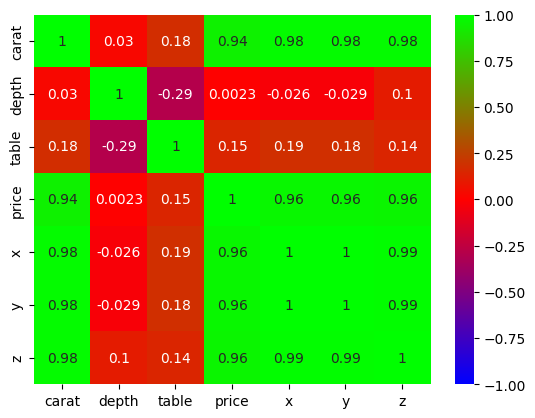

In [49]:
sns.heatmap(my_df[float_cols].corr(), annot=True, vmin=-1, vmax=1, cmap='brg')

Построив матрицу корреляций видим, что целевая переменная почти линейно завсит от фич 'carat', 'x', 'y', 'z', которые очень сильно кореллируют и друг с другом. Кроме того переменные 'table' и 'depth' совсем не корилируют ни с даргетом ни с другими переменнными

Теперь преобразуем категориальные признаки

In [50]:
df_one_hot_encoded = pd.get_dummies(my_df, columns = ['cut', 'color', 'clarity'])

In [51]:
df_one_hot_encoded.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.016667,0.513889,0.333333,0.000000,0.046908,0.064240,0.111782,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,0.005556,0.466667,0.500000,0.000000,0.034115,0.034261,0.075529,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,0.016667,0.386111,0.611111,0.000755,0.068230,0.083512,0.075529,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,0.050000,0.538889,0.416667,0.005978,0.100213,0.117773,0.172205,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,0.061111,0.563889,0.416667,0.006715,0.130064,0.143469,0.208459,False,True,False,...,False,True,False,False,False,True,False,False,False,False


#Построение модели

In [ ]:
y = df_one_hot_encoded[['price']]
X = df_one_hot_encoded
del X['price']

Протестируем несколько различных архитектур и посмотрим, какая лучше сработает на наших данных

##Линейная регрессия

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer



lr1 = LinearRegression().fit(X, y)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

results1 = cross_validate(lr1, X, y, cv=kf, scoring = ('neg_mean_squared_error', 'neg_mean_absolute_error'))
#print(sorted(results.keys()))
print("mae:", -results1['test_neg_mean_absolute_error'].mean())
print("mse:", -results1['test_neg_mean_squared_error'].mean())

mae: 0.025348276247599378
mse: 0.001075459474346265


Посмотрим какие признаки регрессия посчитала наиболее значимыми

In [ ]:
lr1_coefs=lr1.coef_[0]
lr1_coefs

array([-0.42126478,  0.13346992,  0.08416096,  0.78789835,  0.23095778,
        0.65505653, -0.02297222, -0.0031009 ,  0.01435117,  0.00723892,
        0.00448303,  0.05204841,  0.03793921,  0.02805031,  0.01185992,
       -0.01167945, -0.04236574, -0.07585266, -0.16436185,  0.09719148,
       -0.0281472 , -0.06947323,  0.02508731,  0.00834128,  0.07451026,
        0.05685196])

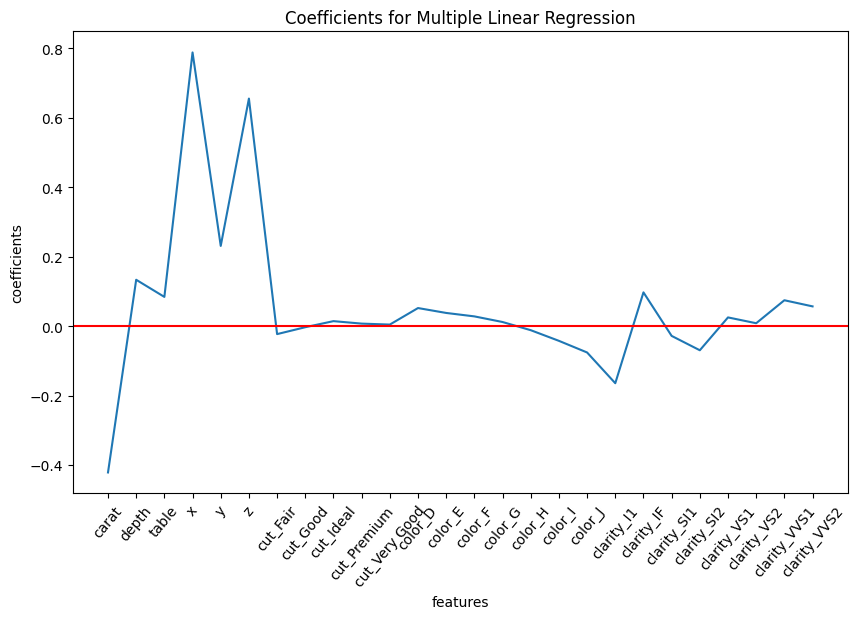

In [ ]:
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.plot(range(len(lr1_coefs)), lr1_coefs)
plt.axhline(0, color = 'r', linestyle = 'solid')
plt.xticks(range(len(feature_names)), feature_names, rotation = 50)
plt.title("Coefficients for Multiple Linear Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

Таким образом видим, что признаки, между которыми ранее была замечена сильная кореляция, имеют высокий вес в итоговой модели, что может привести к проблемам, поэтому будем применять регуляризацию для избежания лишних проблем

##Линейная регрессия с L2 - регуляризацией

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alpha_values = {'alpha': np.linspace(0.2, 0.8, 20)}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

ridge1 = GridSearchCV(Ridge(),
                     alpha_values,
                     scoring = 'neg_mean_squared_error',
                     cv = kf)

print('The best value of alpha is:', ridge1.fit(X,y).best_params_)
print('The best score for the best Ridge estimator is:', -ridge1.fit(X,y).best_score_)

The best value of alpha is: {'alpha': 0.4526315789473685}
The best score for the best Ridge estimator is: 0.0010747614556472743


In [ ]:
results2 = cross_validate(ridge1, X, y, cv=kf, scoring = ('neg_mean_squared_error', 'neg_mean_absolute_error'))
#print(sorted(results.keys()))
print("mae:", -results2['test_neg_mean_absolute_error'].mean())
print("mse:", -results2['test_neg_mean_squared_error'].mean())

mae: 0.02534991365637714
mse: 0.0010749828053772715


In [ ]:
ridge1_coefs=ridge1.fit(X, y).best_estimator_.coef_[0]
ridge1_coefs

array([-0.41389981,  0.14555605,  0.08361258,  0.75766805,  0.27448187,
        0.63108966, -0.02248129, -0.00327954,  0.01419853,  0.00738176,
        0.00418054,  0.05205252,  0.03794678,  0.02807894,  0.01188279,
       -0.01167169, -0.04240424, -0.0758851 , -0.16398755,  0.09696751,
       -0.0280949 , -0.06937676,  0.02505125,  0.00834126,  0.07436152,
        0.05673768])

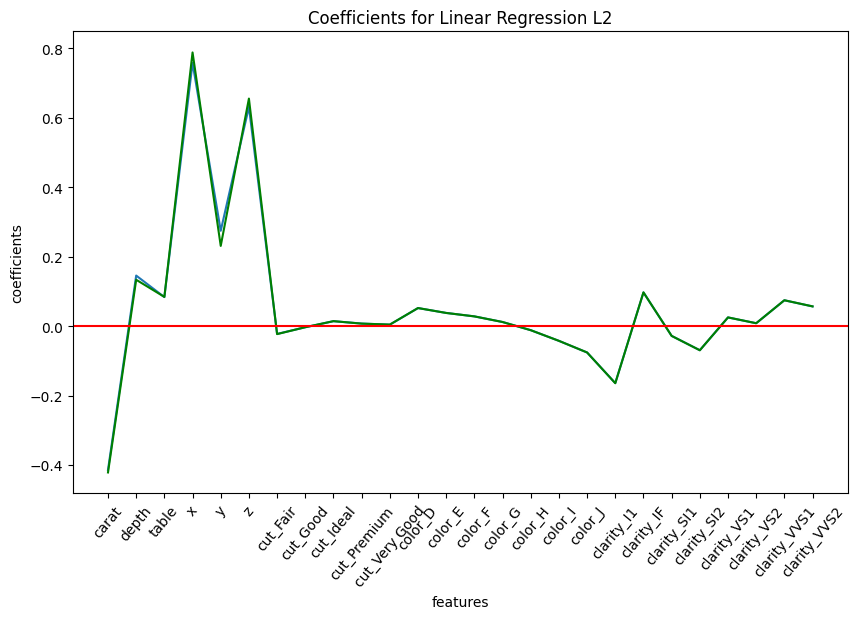

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(ridge1_coefs)), ridge1_coefs)
plt.plot(range(len(lr1_coefs)), lr1_coefs, color = 'green')
plt.axhline(0, color = 'r', linestyle = 'solid')
plt.xticks(range(len(feature_names)), feature_names, rotation = 50)
plt.title("Coefficients for Linear Regression L2")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

##Линейная регрессия с L1 - регуляризацией

In [ ]:
from sklearn.linear_model import Lasso

kf = KFold(n_splits=5, shuffle=True, random_state=42)

lasso1 = GridSearchCV(Lasso(),
                     alpha_values,
                     scoring = 'neg_mean_squared_error',
                     cv = kf)

# Обучение модели
print('The best value of alpha is:', lasso1.fit(X,y).best_params_)

# Вывод среднего значения neg_mean_squared_error
print('The best score for the best Lasso estimator is:', lasso1.fit(X,y).best_score_)

The best value of alpha is: {'alpha': 0.2}
The best score for the best Lasso estimator is: -0.05730989018533935


In [ ]:
results3 = cross_validate(lasso1, X, y, cv=kf, scoring = ('neg_mean_squared_error', 'neg_mean_absolute_error'))
#print(sorted(results.keys()))
print("mae:", -results3['test_neg_mean_absolute_error'].mean())
print("mse:", -results3['test_neg_mean_squared_error'].mean())

mae: 0.2075244726206828
mse: 0.05730989018533935


In [ ]:
lasso1_coefs=lasso1.fit(X, y).best_estimator_.coef_
lasso1_coefs

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0., -0., -0.,
        0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0., -0.,  0., -0., -0.])

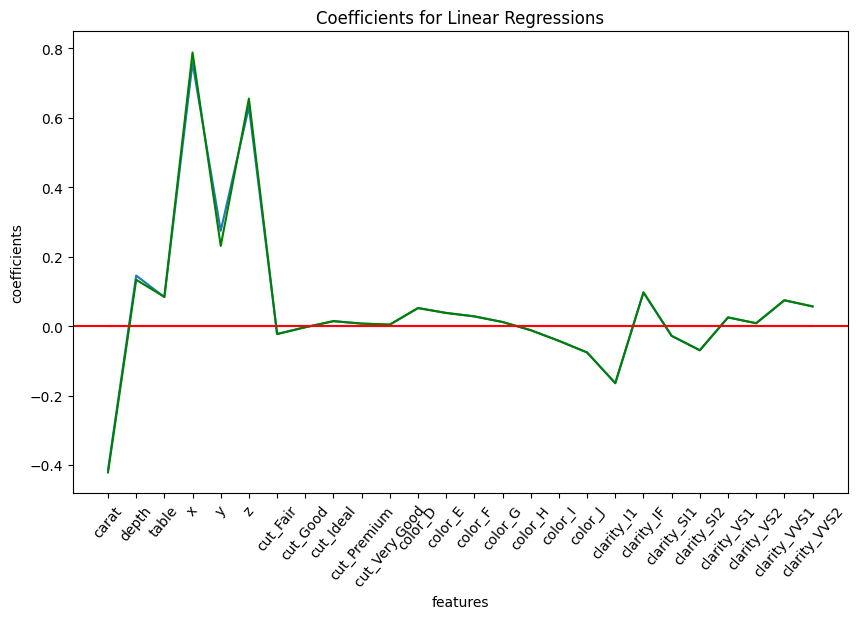

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(lasso1_coefs)), lasso1_coefs, color = 'm')
plt.plot(range(len(ridge1_coefs)), ridge1_coefs)
plt.plot(range(len(lr1_coefs)), lr1_coefs, color = 'green')
plt.axhline(0, color = 'r', linestyle = 'solid')
plt.xticks(range(len(feature_names)), feature_names, rotation = 50)
plt.title("Coefficients for Linear Regressions")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

#Итог

In [ ]:
model = ridge1.fit(X, y)